In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
def update_variance(v, kappa, theta, xi, dt, Zv):
    v_next = v + kappa * (theta - v) * dt + xi * np.sqrt(v) * np.sqrt(dt) * Zv + 0.25 * xi**2 * dt * (Zv**2 - 1)
    return v_next

def update_stock_price(S, r, v, dt, Zs):
    S_next = S + r * S * dt + np.sqrt(v) * S * np.sqrt(dt) * Zs + 0.5 * v * S * dt * (Zs**2 - 1)
    return S_next

def heston_simulation(S0, B, v0, T, r, K, kappa, theta, xi, rho, num_steps):
    dt = T / num_steps
    stock_prices = np.zeros(num_steps + 1)
    variances = np.zeros(num_steps + 1)
    stock_prices[0] = S0
    variances[0] = v0

    for i in range(1, num_steps + 1):
        Zv = np.random.normal(0, 1)
        Zs = rho * Zv + np.sqrt(1 - rho**2) * np.random.normal(0, 1)
        variances[i] = update_variance(variances[i - 1], kappa, theta, xi, dt, Zv)
        stock_prices[i] = update_stock_price(stock_prices[i - 1], r, variances[i - 1], dt, Zs)

        if stock_prices[i] >= B:
            payoff = 0
            return stock_prices, variances, payoff
            
    
    payoff = np.maximum(stock_prices[-1] - K, 0)

    return stock_prices, variances, payoff
 
def heston_simulation_wrapper(S0, B, v0, T, r, K, kappa, theta, xi, rho, num_simulations, num_steps):
    payoffs = np.zeros(num_simulations)

    for i in range(num_simulations):
        stock_prices, variances, payoff = heston_simulation(S0, B, v0, T, r, K, kappa, theta, xi, rho, num_steps)
        payoffs[i] = payoff

    return np.mean(payoffs)

In [3]:
S0 = 100
B = 120
K = 100
v0 = 0.06
T = 1
r = 0.05
kappa = 2
theta = 0.04
xi = 0.1
rho = -0.7
num_simulations = 10000
num_steps = 100


In [4]:
option_prices = []
for b in np.arange(110, 130, 2):
    option_price = heston_simulation_wrapper(S0, b, v0, T, r, K, kappa, theta, xi, rho, num_simulations, num_steps)
    option_prices.append(option_price)

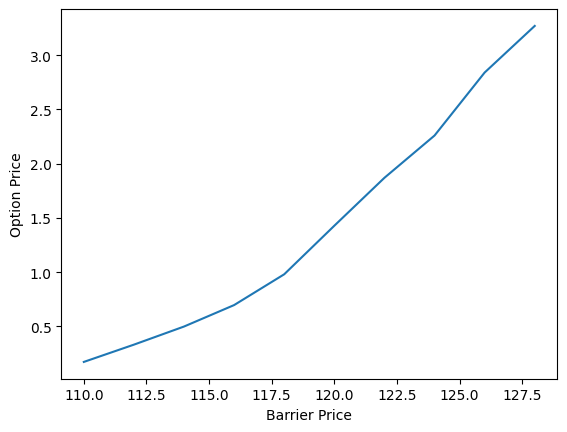

In [5]:
plt.plot(np.arange(110, 130, 2), option_prices)
plt.xlabel('Barrier Price')
plt.ylabel('Option Price')
plt.show()


In [6]:
option_prices = []

for rho in np.arange(-0.9, 1, 0.1):
    option_price = heston_simulation_wrapper(S0, B, v0, T, r, K, kappa, theta, xi, rho, num_simulations, num_steps)
    option_prices.append(option_price)

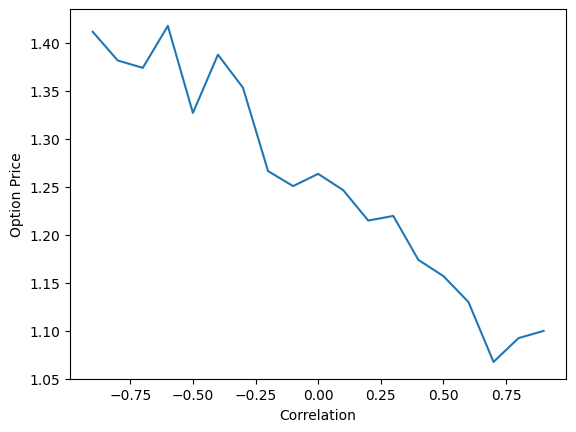

In [7]:
plt.plot(np.arange(-0.9, 1, 0.1), option_prices)
plt.xlabel('Correlation')
plt.ylabel('Option Price')
plt.show()


In [8]:
option_prices = []

for xi in np.arange(0.05, 0.25, 0.02):
    option_price = heston_simulation_wrapper(S0, B, v0, T, r, K, kappa, theta, xi, rho, num_simulations, num_steps)
    option_prices.append(option_price)
    

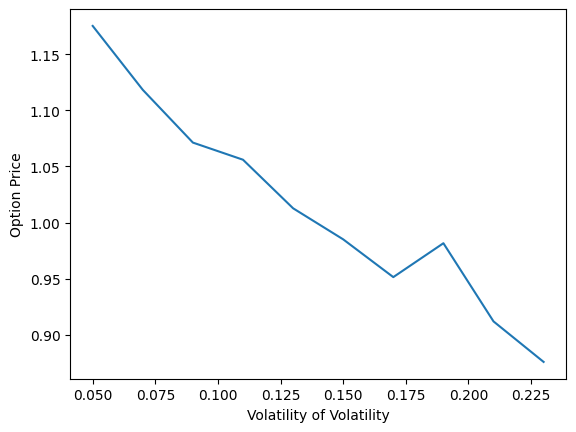

In [9]:
plt.plot(np.arange(0.05, 0.25, 0.02), option_prices)
plt.xlabel('Volatility of Volatility')
plt.ylabel('Option Price')
plt.show()

In [10]:
for rho in np.arange(-0.9, 1, 0.1):
    option_prices = []
    for xi in np.arange(0.05, 0.25, 0.02):
        option_price = heston_simulation_wrapper(S0, B, v0, T, r, K, kappa, theta, xi, rho, num_simulations, num_steps)
        option_prices.append(option_price)
    plt.plot(np.arange(0.05, 0.25, 0.02), option_prices, label=f'rho = {rho}')